In [8]:
import xgboost as xb
import pandas as pd
import numpy as np

In [25]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()
data = breast_cancer_data.data
target = breast_cancer_data.target

data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
X = data[:]

data['target']=breast_cancer_data.target
y = data['target']

# Data Preprocessing Logic goes here

# XGBoost Implementation

In [31]:
xb_cls = xb.XGBClassifier(learning_rate=0.1, n_estimators=100, objective='binary:logistic', random_state=101)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
trainX, testX, trainY, testY = train_test_split(X,y, test_size=.20)

In [34]:
model = xb_cls.fit(trainX, trainY)

In [36]:
feature_imp = model.feature_importances_

In [38]:
import matplotlib.pyplot as plt
import seaborn as sb

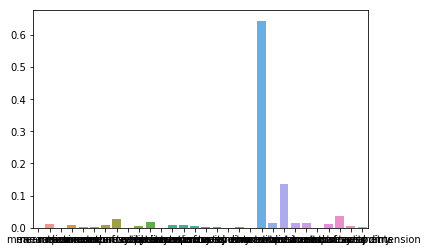

In [42]:
sb.barplot(breast_cancer_data.feature_names, feature_imp, orient="v")

In [43]:
predictedY = model.predict(testX)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

acs = accuracy_score(testY, predictedY)
print (acs)

cm = confusion_matrix(testY, predictedY)
print (cm)

0.9736842105263158
[[48  0]
 [ 3 63]]


# XGBoost Cross validation

In [63]:
# Create the DMatrix

dMatrix = xb.DMatrix(data=X, label=y)

params = {"objective":"binary:logistic"}

cv_results = xb.cv(params=params, dtrain=dMatrix,nfold=5, num_boost_round=20, metrics='error',as_pandas=True)
accuracy = 1 - cv_results['test-error-std']
print (accuracy.iloc[-1])
print (accuracy[19])


0.9805016826879857
0.9805016826879857
